In [1]:
## Importing the Important libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import RocCurveDisplay


In [2]:
## Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Visualisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [4]:
## Data Display Customization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 1. Data Preparation

# 1.1 Data Loading

In [7]:
# importing the dataframe
sathya_df = pd.read_csv('Leads.csv')
sathya_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Directory

In [9]:
vani=pd.read_excel("Leads Data Dictionary.xlsx")
vani.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...


In [10]:
pd.set_option('display.max_colwidth', None) # Allows unlimited column width
vani.drop('Unnamed: 0', inplace=True, axis=1)
vani.columns = vani.iloc[1]
vani = vani.iloc[2:]
vani.reset_index(drop=True, inplace=True)
vani.head(len(vani))

1,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


## Duplicate Check

In [12]:
import pandas as pd
sathya = pd.read_csv("Leads.csv")
sathya_dub = sathya.copy()

# Checking for duplicates and dropping the entireduplicate column if any 
sathya_dub.drop_duplicates(subset=None, inplace=True)
sathya_dub.shape

(9240, 37)

In [13]:
sathya.shape

(9240, 37)

In [14]:
## The shape after running th drop duplicate command is as same as the original dataset
## Hence we can conclude that there were zero dupliate values in the dataset.

# 1.2 Inspecting Data

In [16]:
# Inspecting dataframe
print(sathya_df.shape)

(9240, 37)


In [17]:
sathya_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
sathya_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 # 1.3 Data Imbalance

  We need to check the balance with respect to the target variable: converted

In [20]:
# Calculating Imbalance percentage 
# Since the majority is target0 and minority is target1
# zero count
z_cnt = len(sathya_df[sathya_df['Converted'] == 0])
# one count
o_cnt = len(sathya_df[sathya_df['Converted'] == 1])

print ('Count of Converted = 0: {0} \nCount of Converted = 1: {1}'.format(z_cnt,o_cnt))

print ('Imbalance Ratio is : {0}'.format(round(z_cnt/o_cnt,2)))

Count of Converted = 0: 5679 
Count of Converted = 1: 3561
Imbalance Ratio is : 1.59


Text(0, 0.5, 'count')

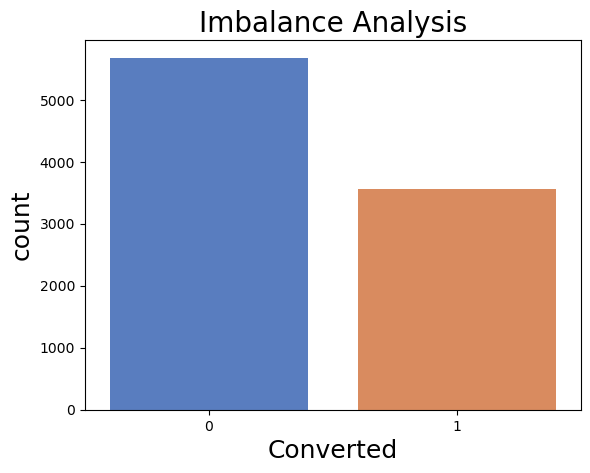

In [21]:
## Plotting the imbalance Analysis:
plt.title('Imbalance Analysis',  fontsize=20)
sns.countplot(data = sathya_df, x='Converted', palette='muted')
plt.xlabel('Converted', fontsize=18)
plt.ylabel('count', fontsize=18)

  The data is not too much imbalanced. As such, we can proceed with the data for analysis and model building

# 1.4 Data Cleaning

  As we can see from the dataframe a lot of categorical datatype columns have 'select' as option and some are in caps.
  We will remove select and put it as null, but first we need to make the data lowercase.

In [24]:
# Converting 'Select' values to NaN.

sathya_df = sathya_df.replace('Select', np.nan)

sathya_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Missing Value Percentage

 How did you hear about X Education and Lead Profile have lots of missing values. These columns need to be dropped

In [27]:
# Dropping columns with 70% missing values for now.

sathya_df.drop(columns = ['How did you hear about X Education','Lead Profile'] ,inplace = True)

# Percentage missing
round(100*(sathya_df.isnull().sum()/len(sathya_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

 Now lets take care of missing values in other columns

 Lead Quality: Indicates the quality of sathya based on the data and intuition the the employee who has been assigned to the lead

In [30]:
# lets inspect lead quality

sathya_df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

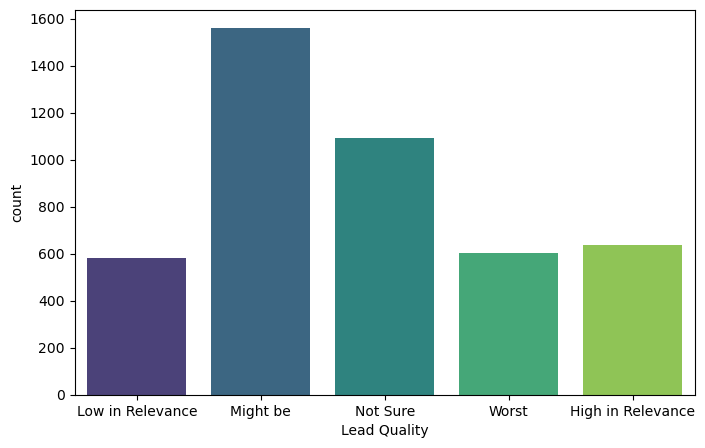

In [31]:
## Visualising lead quality

 # Set the figure size
plt.figure(figsize=(8, 5))

# Create a count plot with different colors
sns.countplot(x=sathya_df['Lead Quality'], palette='viridis')

# Show the plot
plt.show()

In [32]:
# Lead Quality depends on institution NaN can be replace with not sure category

sathya_df['Lead Quality'] = sathya_df['Lead Quality'].replace(np.nan, 'Not Sure')

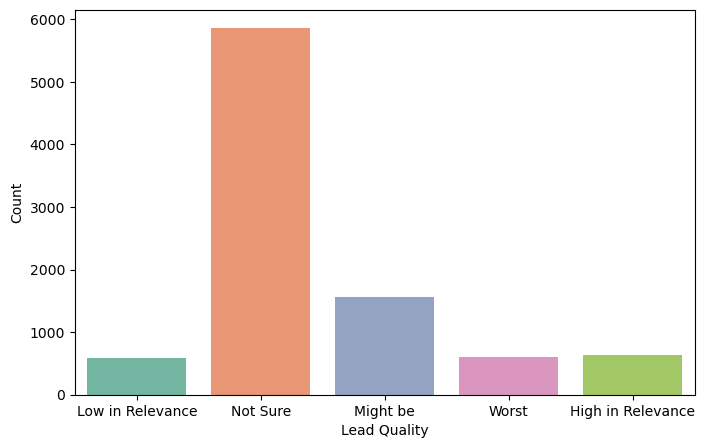

In [33]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=sathya_df['Lead Quality'], palette='Set2')

ax.set_xlabel("Lead Quality")
ax.set_ylabel("Count")
plt.show()

In [34]:
# Asymmetrique Activity Index  |
# Asymmetrique Profile Index   \   An index and score assigned to each customer
# Asymmetrique Activity Score  |    based on their activity and their profile
# Asymmetrique Profile Score   \

# All the above columns have the same missing values

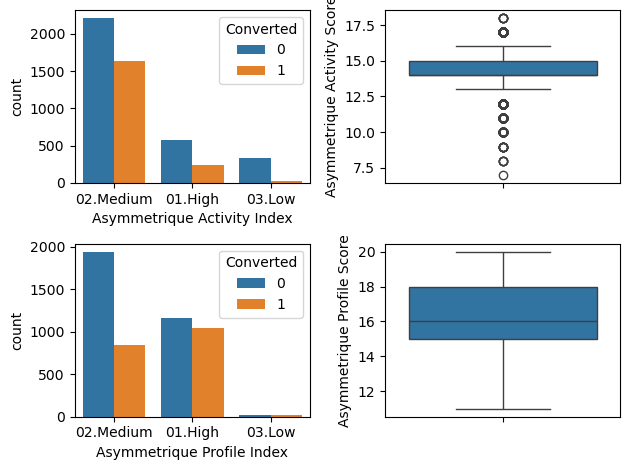

In [36]:
fig, axs = plt.subplots(2,2)
plt1 = sns.countplot(data = sathya_df, x ='Asymmetrique Activity Index', ax = axs[0,0], hue = 'Converted')
plt2 = sns.boxplot(sathya_df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data = sathya_df, x ='Asymmetrique Profile Index', ax = axs[1,0], hue = 'Converted')
plt4 = sns.boxplot(sathya_df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

The missing value imputation in these cases becomes difficult as the Activity Score depends upon the Activity Index and
one simply can't impute lack of activity. Let's drop these columns initially and see if it affects are final results.  45% missing values also makes it difficult to drop the rows as half of our data will be lost.

In [38]:
# Droppingthe Asymmetrique columns

sathya_df.drop(['Asymmetrique Activity Index',
              'Asymmetrique Activity Score',
              'Asymmetrique Profile Index',
              'Asymmetrique Profile Score'], axis = 1, inplace = True)

round(100*(sathya_df.isnull().sum()/len(sathya_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## City : The city of the customer

In [40]:
sathya.City.value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [41]:
sathya.City.describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

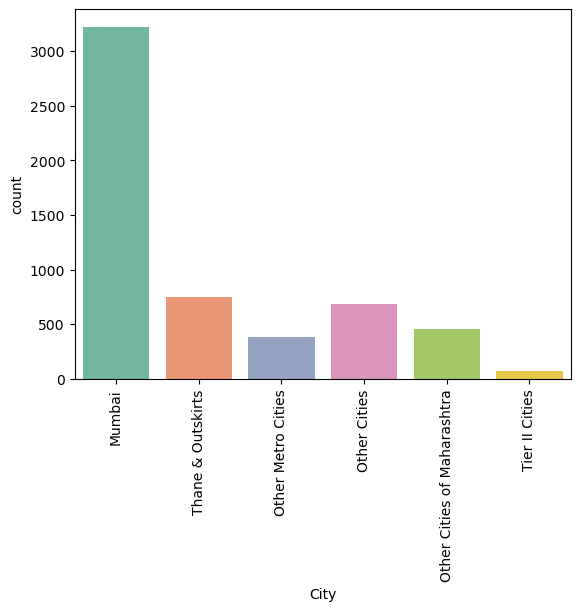

In [42]:
# Visualizing City
sns.countplot(x=sathya_df['City'], palette='Set2')
plt.xticks(rotation = 90)
plt.show()

 Most of the values seem to belong to Mumbai city. 
 Choice of city shouldn't matter much in terms of target 'Converted'. So, let's impute missing values with Mumbai.

In [44]:
sathya_df['City'] = sathya_df['City'].replace(np.nan, 'Mumbai')

 Specialization: The industry domain in which the customer worked before. 
 Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

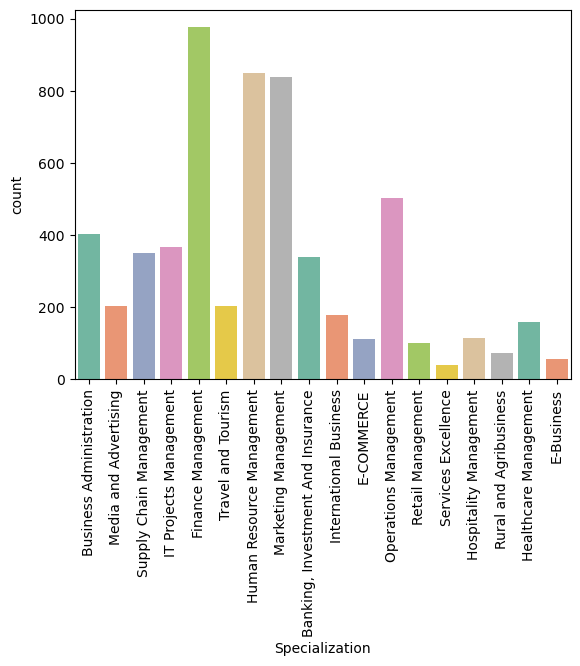

In [46]:
# Visualizing Specilization
sns.countplot(x=sathya_df['Specialization'], palette='Set2')
plt.xticks(rotation = 90)
plt.show()

 It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
 may not have any specialization or is a student. Hence we can make a category "Others" for missing values.

In [48]:
sathya_df['Specialization'] = sathya_df['Specialization'].replace(np.nan, 'Others')

## Tags: Tags assigned to customers indicating the current status of the lead.

In [50]:
# Inpsecting Tags
sathya_df.Tags.value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

 Tags and Last Notable Activity are assigned by the sales team while working on the leads and 
 does not directly affect identification of hot leads. We can drop these columns

In [52]:
## Dropping unwanted columns
sathya_df.drop(columns = ['Tags','Last Notable Activity'], inplace = True)

In [53]:
round(100*(sathya_df.isnull().sum()/len(sathya_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## What matters most to you in choosing a course:An option selected by the customer indicating what is their main motto behind doing this course.

In [55]:
# Inspecting the column

sathya_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

## The missing values can be imputed using 'better career prospects' as nearly all have selected that option

In [57]:
## Imputing

sathya_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects',inplace = True)

## What is your current occupation: Indicates whether the customer is a student, umemployed or employed.

In [59]:
## Inspecting occupation
sathya_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [60]:
print(sathya_df['What is your current occupation'].value_counts())

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64


 86% entries are of Unemployed so we can impute "Unemployed" in it.

In [62]:
## Imputing
sathya_df['What is your current occupation'].replace(np.nan, 'Unemployed', inplace = True)

## Country: The country of the customer.

In [64]:
# Country is India for most values so let's impute the same in missing values.

sathya_df['Country'].replace(np.nan, 'India', inplace = True)

Also a lot of other foreign countries have very low frequencies. We can club all these together in category 'Outside India'

In [66]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    else:
        category = "Outside India"
    return category

sathya_df['Country'] = sathya_df.apply(lambda x:slots(x['Country']), axis = 1)
sathya_df['Country'].value_counts()

Country
India            8953
Outside India     287
Name: count, dtype: int64

In [67]:
round(100*(sathya_df.isnull().sum()/len(sathya_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

The rest of the missing values are under 2% and as such dropping these records won't affect our analysis much

In [69]:
sathya_df.dropna(inplace = True)
round(100*(sathya_df.isnull().sum()/len(sathya_df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

Prospect ID and Lead Origin are unique identification. They are as such not required to determine the hot leads. We shall drop them.

In [71]:
sathya_df.drop(columns = ['Prospect ID','Lead Number'], inplace = True)

1.5 Identify Data Types and Make Required Conversions

In [73]:
# A function to find the constant features. 
# Constant features are those features which have only one distinct value.

def find_constant_features(sathya_df):
    constFeatures = []
    for col in list(sathya_df.columns):
        if sathya_df[col].unique().size < 2:
            constFeatures.append(col)
    return constFeatures

constFeatures_col_list = find_constant_features(sathya_df)
print(constFeatures_col_list)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


We have to delete the constant features

In [75]:
sathya_df.drop(columns = constFeatures_col_list,inplace = True)

We can convert Boolean categorical features into Numeric types by mapping 'yes':1 and 'no':0

In [77]:
# Identify the boolean features

boolFeatures = []

for col in list(sathya_df.columns):
    if sathya_df[col].nunique() == 2:  #Features with only 2 unique values as boolean
        boolFeatures.append(col)


print(boolFeatures)

['Do Not Email', 'Do Not Call', 'Converted', 'Country', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


Converted and Country have to be removed from the list for obvious reasons

In [79]:
boolFeatures.remove('Converted')
boolFeatures.remove('Country')

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

sathya_df[boolFeatures] = sathya_df[boolFeatures].apply(binary_map)

In [80]:
sathya_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

Data has been cleaned and we can now proceed with the analysis

 2. EDA and Data Viz

The next step is to visualise the data using matplotlib and seaborn.

This is one of the most important step in understanding the data. This step will help us understand the properties of data.

 Identify any outliers.
 Obvious multicollinearity going on.
 Identify the data types of the features, make any conversions if needed, and conduct sanity checks.

2.1 Univariate Analysis of Boolean Variables

2.1.1 Boolean Variables

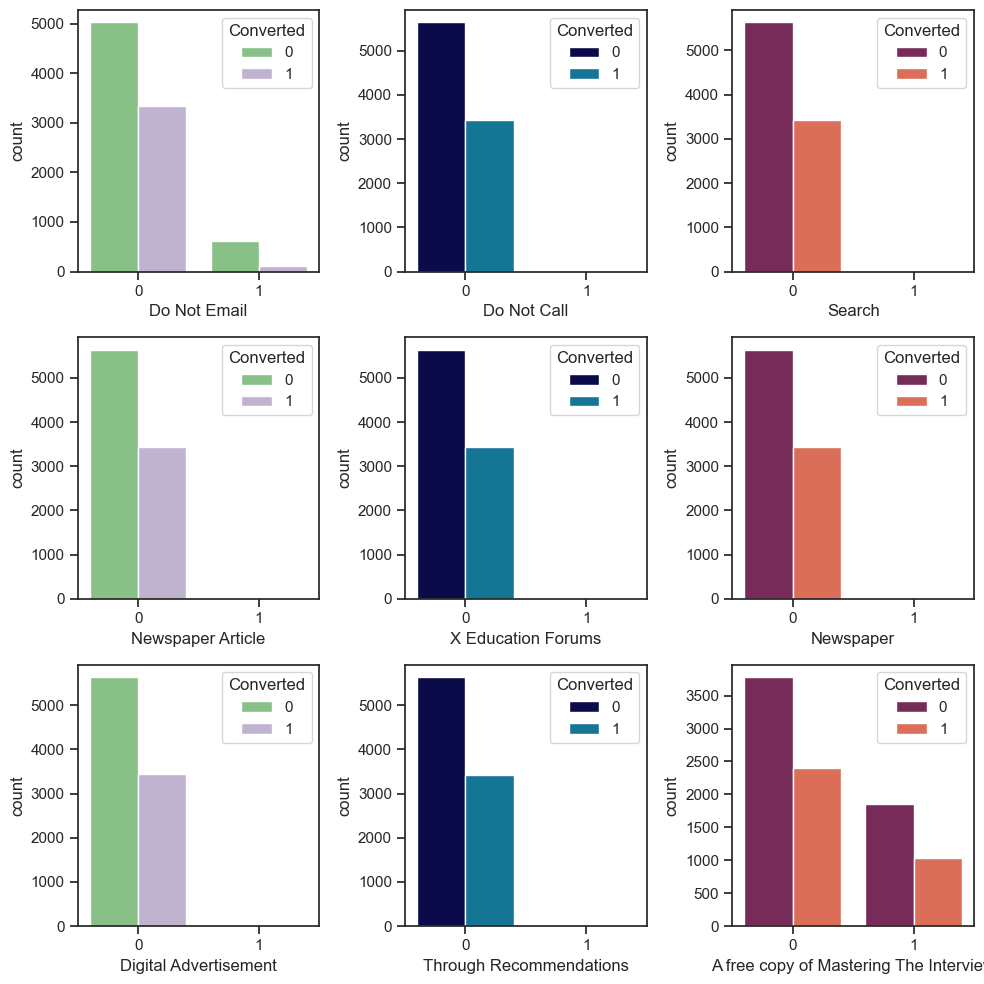

In [86]:
# colors = ['Accent', 'PiYG' , 'RdPu', 'icefire' , 'ocean' , 'gist_earth', 'magma', 'plasma', 'rocket']
colors = ['Accent', 'ocean', 'rocket'] * 3
sns.set(style='ticks',color_codes=True)
plt.figure(figsize = (10,10))
for i, x_var in enumerate(boolFeatures):
    plt.subplot(3, 3, i+1)
    chart = sns.countplot(x = x_var, data = sathya_df, hue='Converted', palette=colors[i])
    plt.tight_layout()

We can see that only two features: Do Not Email and A free copy of Mastering The Interview have a health balance of 1's and 0's.
We can drop the rest of the Boolean Features.

In [88]:
dropFeatures = [ 'Do Not Call',
                 'Search',
                 'Newspaper Article',
                 'X Education Forums',
                 'Newspaper',
                 'Digital Advertisement',
                 'Through Recommendations']

In [89]:
# Dropping from dataframe

sathya_df.drop(columns = dropFeatures, inplace = True)

In [90]:
sathya_df.shape

(9074, 15)

In [91]:
# These are the column lists after Boolean EDA analysis

col_list = sathya_df.columns

cat_col = sathya_df.select_dtypes(include = ['object']).columns

print(cat_col)

num_col = sathya_df.select_dtypes(exclude = ['object']).columns

print(num_col)

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Quality',
       'City'],
      dtype='object')
Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')


2.2 Univariate Analysis of Categorical Variables

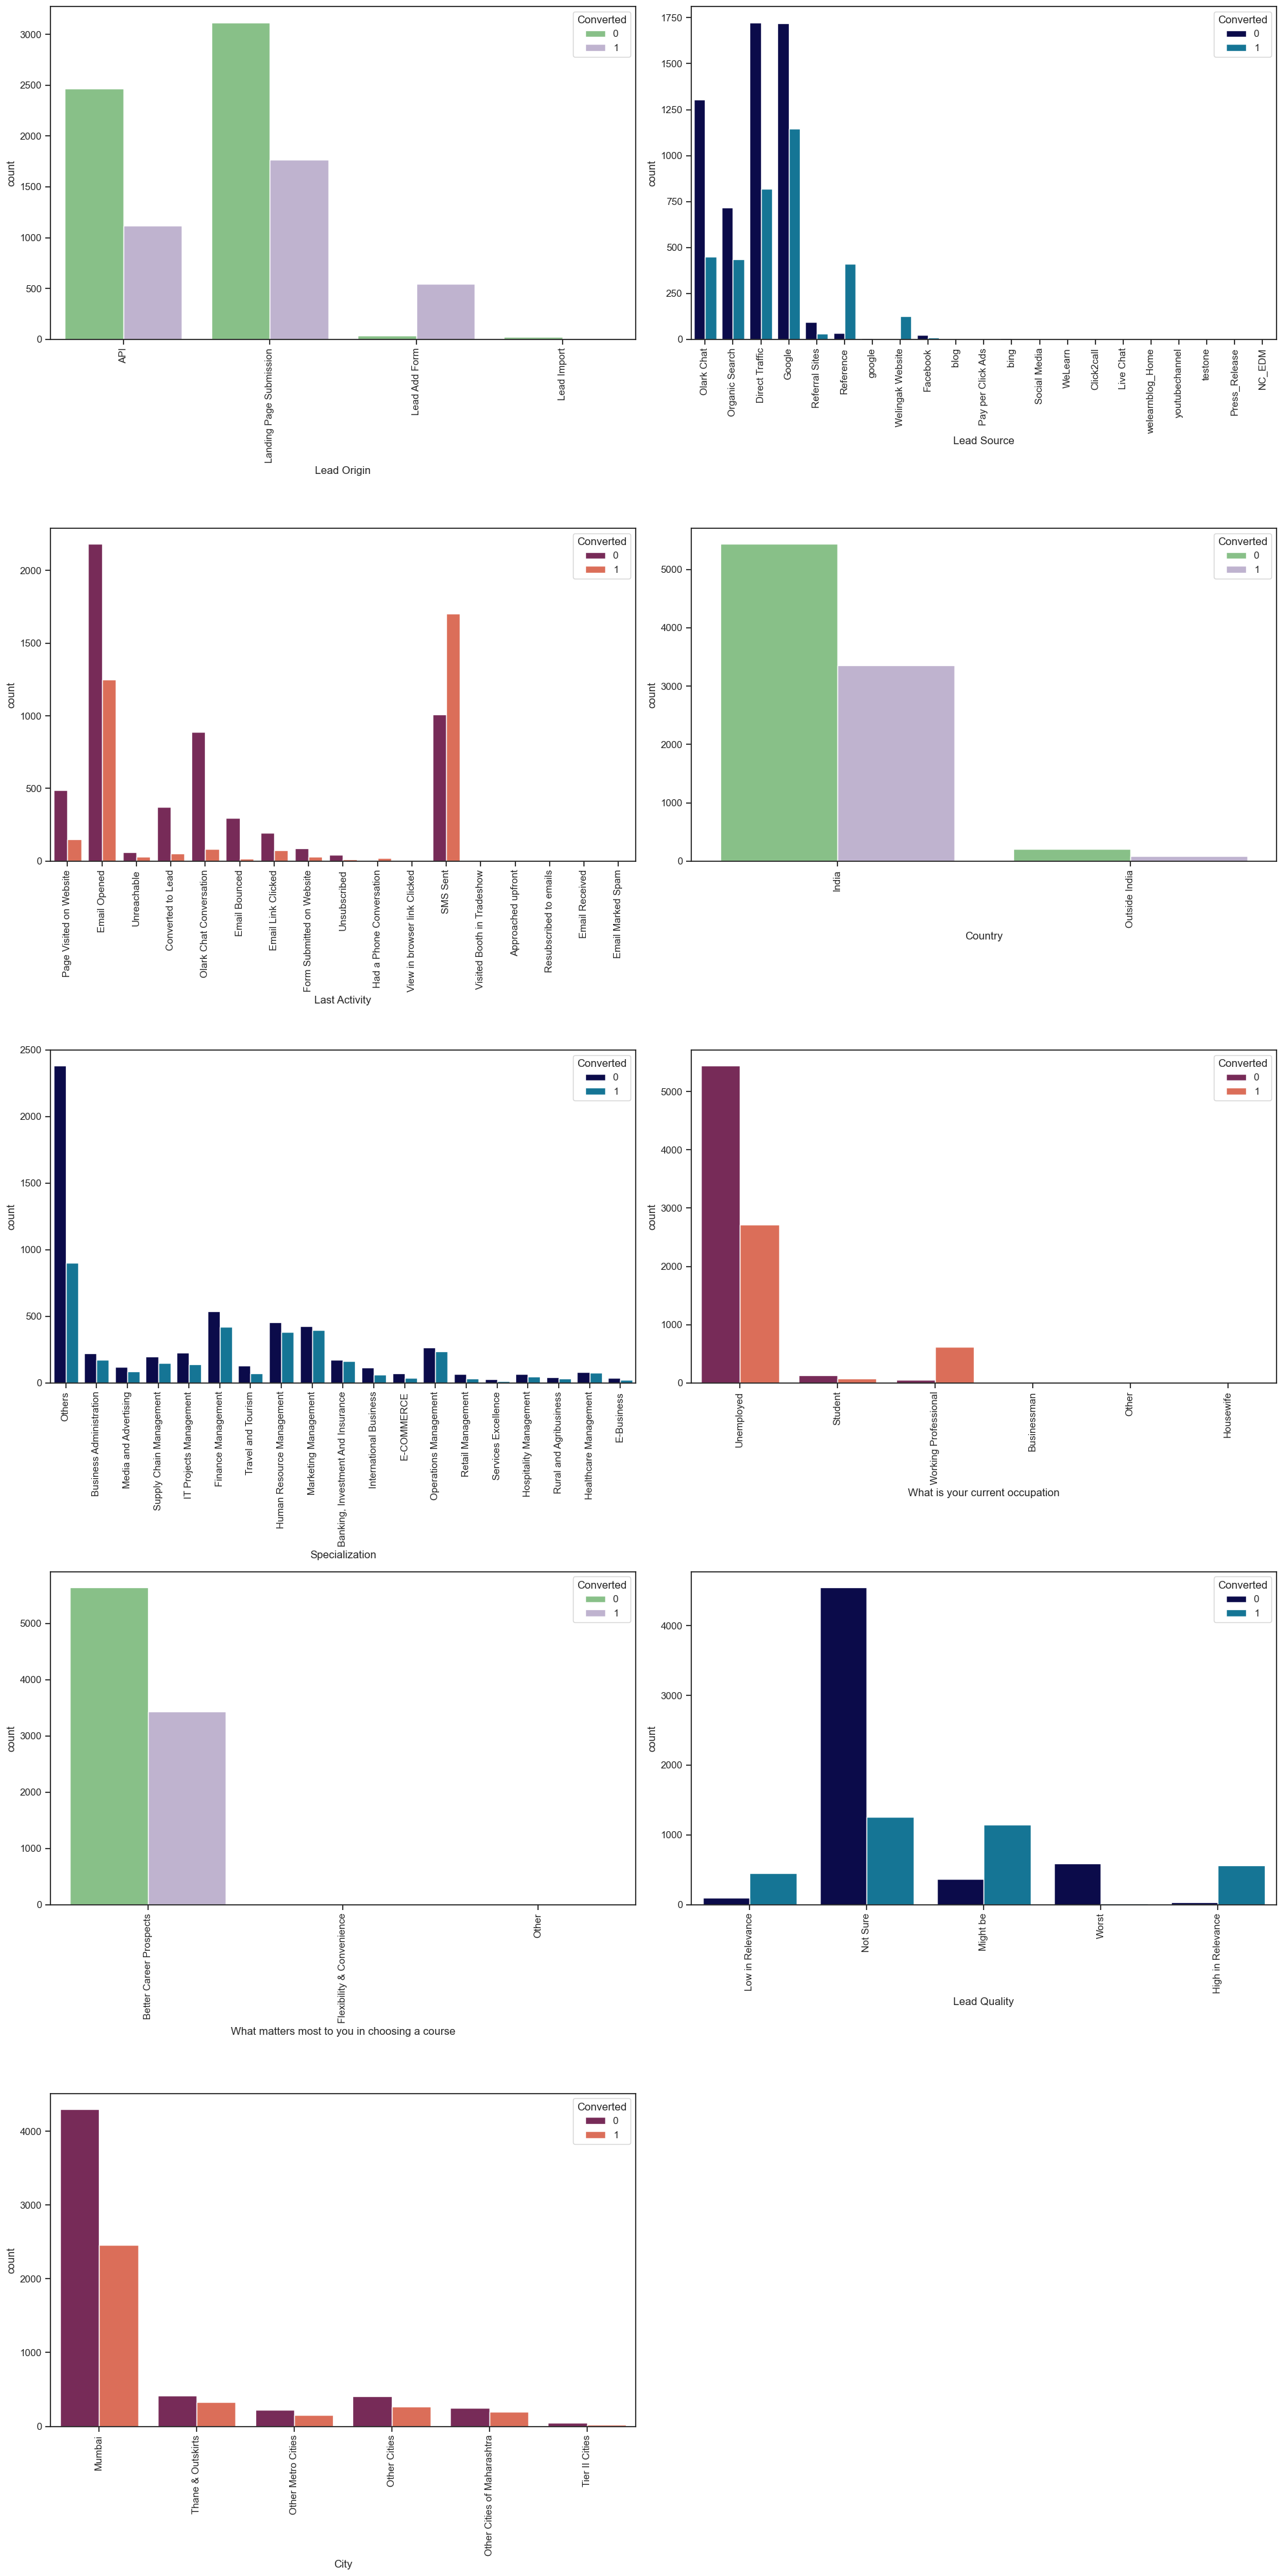

In [93]:
# Plotting countplots for each categorical variable
# colors = ['Accent', 'PiYG' , 'RdPu', 'icefire' , 'ocean' , 'gist_earth', 'magma', 'plasma', 'rocket']
colors = ['Accent', 'ocean', 'rocket'] * 3
sns.set(style='ticks',color_codes=True)

plt.figure(figsize = (20,40))

for i, x_var in enumerate(list(cat_col)):
    plt.subplot(5, 2, i+1)
    chart = sns.countplot(x = x_var, data = sathya_df, hue='Converted', palette=colors[i])
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.tight_layout()

We can see from above that Country and What matters most to you in choosing a course are both highly skewed. 
These can be dropped.

In [95]:
# Dropping highly skewed data as it will affect further analysis

dropFeatures = ['Country', 'What matters most to you in choosing a course']

sathya_df.drop(columns=dropFeatures, inplace=True)

Replace the values with spelling corrections in the categories for categorical columns

In [97]:
# google is spelt wrong
sathya_df['Lead Source'] = sathya_df['Lead Source'].replace(['google'], 'Google')

In [98]:
# Updated categorical list
cat_col = sathya_df.select_dtypes(include = ['object']).columns

cat_list = list(cat_col)

print(cat_list)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Lead Quality', 'City']


In [99]:
for item in cat_list:
    print (f'Value Counts for {item}: \n {sathya_df[item].value_counts()} \n')

Value Counts for Lead Origin: 
 Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64 

Value Counts for Lead Source: 
 Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64 

Value Counts for Last Activity: 
 Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to

We can bucket the categorical with very low counts together. This way we reduce the number of dummy variables created 
and proceed to faster and efficient analysis

In [101]:
# Since there are so many categories in the categorical features with less than 2% counts each, we can 
# combine all those categories into one category called 'Others'

for item in cat_list:
    replaceFeatures = []
    categories = sathya_df[item].value_counts()
    list1 = sathya_df[item].value_counts().keys().tolist()
    for i, v in enumerate (categories):
        if v <= 200:  ## Anything less than 200
            replaceFeatures.append(list1[i])
    sathya_df[item] = sathya_df[item].replace(replaceFeatures, 'Others')
    print (f'Categories replaced for column {item} are: \n {replaceFeatures} \n')


Categories replaced for column Lead Origin are: 
 ['Lead Import'] 

Categories replaced for column Lead Source are: 
 ['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release', 'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel', 'testone', 'NC_EDM'] 

Categories replaced for column Last Activity are: 
 ['Form Submitted on Website', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'] 

Categories replaced for column Specialization are: 
 ['International Business', 'Healthcare Management', 'E-COMMERCE', 'Hospitality Management', 'Retail Management', 'Rural and Agribusiness', 'E-Business', 'Services Excellence'] 

Categories replaced for column What is your current occupation are: 
 ['Other', 'Housewife', 'Businessman'] 

Categories replaced for colum

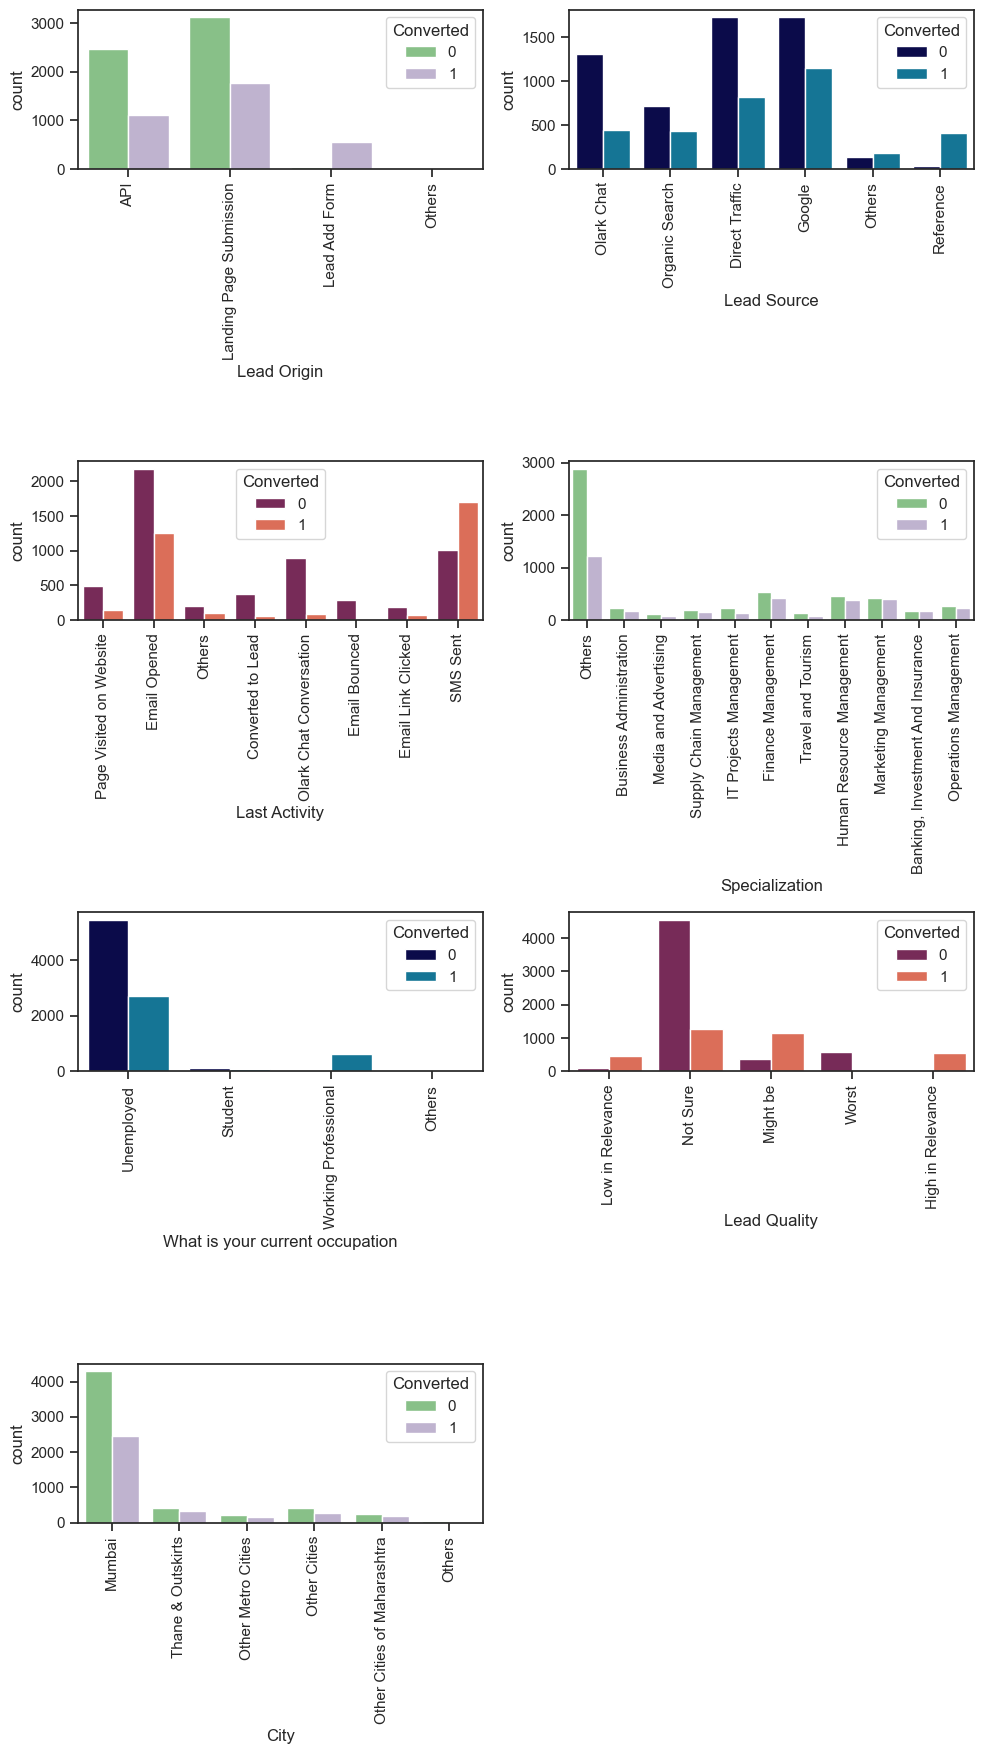

In [102]:
# Plotting countplots for each categorical variable again
colors = ['Accent', 'ocean', 'rocket'] * 3
sns.set(style='ticks',color_codes=True)

plt.figure(figsize = (10,20))

for i, x_var in enumerate(list(cat_col)):
    plt.subplot(5, 2, i+1)
    chart = sns.countplot(x = x_var, data = sathya_df, hue='Converted', palette=colors[i])
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.tight_layout()

This brings an end to Categorical EDA Analysis

2.3 Univariate Analysis of Numerical Variables

In [105]:
# These are the numeric features

print(list(num_col))

['Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']


We know from above that Do Not Email and A free copy of Mastering The Interview are boolean types and have already done EDA on it.

In [107]:
num_list = list(num_col)
num_list.remove('Do Not Email')
num_list.remove('A free copy of Mastering The Interview')

<Figure size 1500x1500 with 0 Axes>

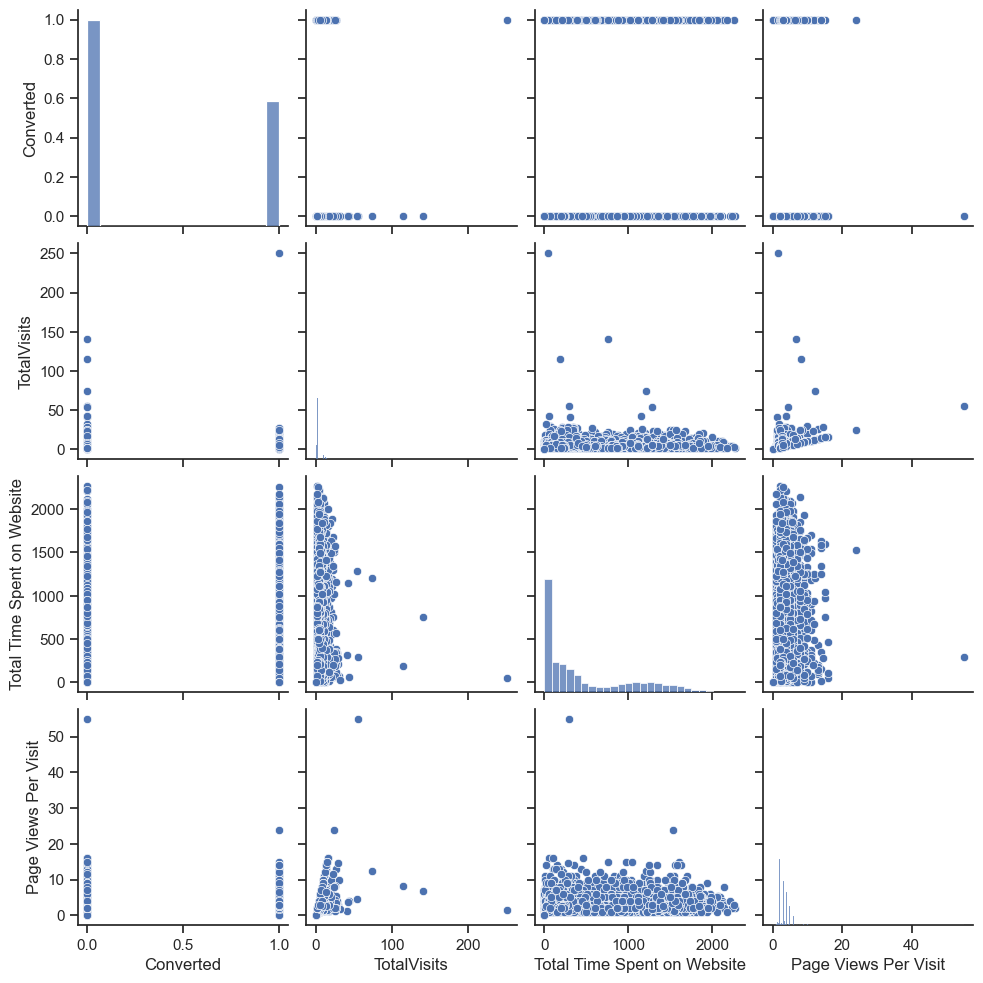

In [108]:
# Analyze the numeric features

sns.set(style='ticks',color_codes=True)
fig = plt.figure(figsize = (15, 15))
g = sns.pairplot(data = sathya_df[num_list])

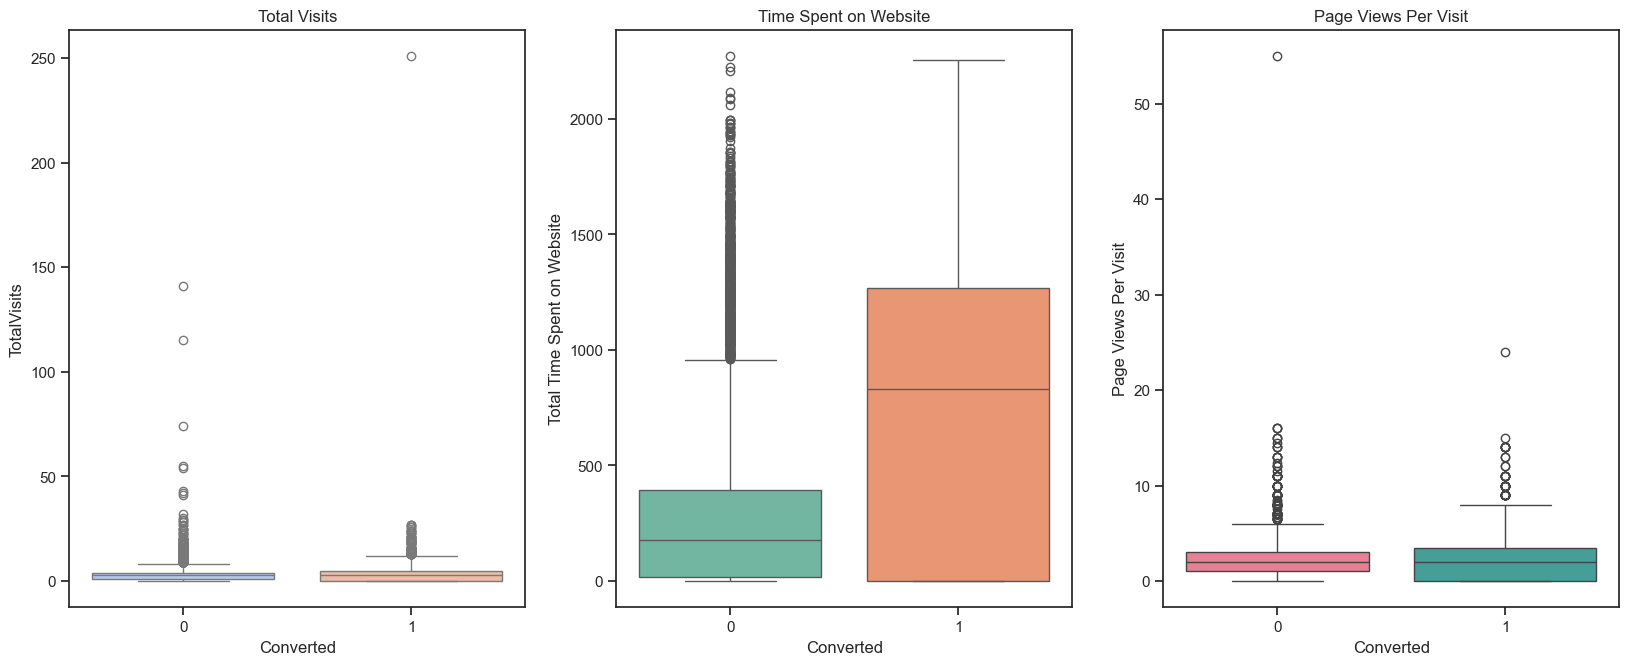

In [109]:
# Plotting the boxplots
# Set figure size
plt.figure(figsize=(20, 7.5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Converted', y='TotalVisits', data=sathya_df, palette='coolwarm')
plt.title('Total Visits')

plt.subplot(1, 3, 2)
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=sathya_df, palette='Set2')
plt.title('Time Spent on Website')

plt.subplot(1, 3, 3)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=sathya_df, palette='husl')
plt.title('Page Views Per Visit')

# Show the plots
plt.show()

The features 'TotalVisits', 'Page Views Per Visit' have outliers and they can be capped at 0.01 and 0.99 th quantiles

In [111]:
cap_outliers = ['TotalVisits', 'Page Views Per Visit']

# Cap the outliers for the Numeric features at 0.01 and 0.99

for i, item in enumerate(cap_outliers):
    q_low = sathya_df[item].quantile(0.01)
    q_upp = sathya_df[item].quantile(0.99)
    sathya_df[item][sathya_df[item]<=q_low] = q_low
    sathya_df[item][sathya_df[item]>=q_upp] = q_upp

Text(0.5, 1.0, 'Page Views')

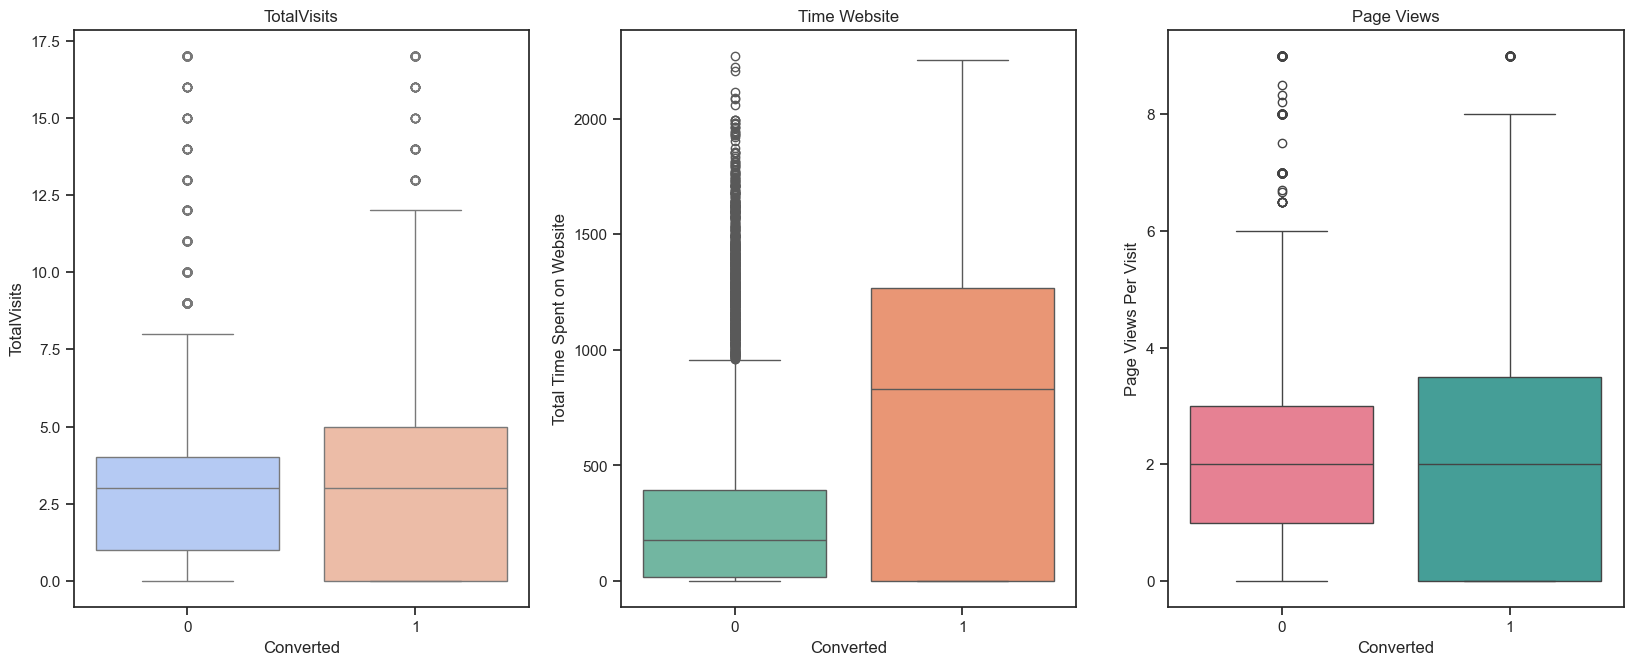

In [112]:
# Plotting the boxplots after capping outliers

plt.figure(figsize = (20,7.5))

plt.subplot(1,3,1)
sns.boxplot(x = 'Converted',y = 'TotalVisits', data = sathya_df, palette='coolwarm')
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(x = 'Converted',y = 'Total Time Spent on Website', data = sathya_df, palette='Set2' )
plt.title('Time Website')

plt.subplot(1,3,3)
sns.boxplot(x = 'Converted',y = 'Page Views Per Visit', data = sathya_df, palette='husl')
plt.title('Page Views')

2.4 HeatMap Colinearity Check

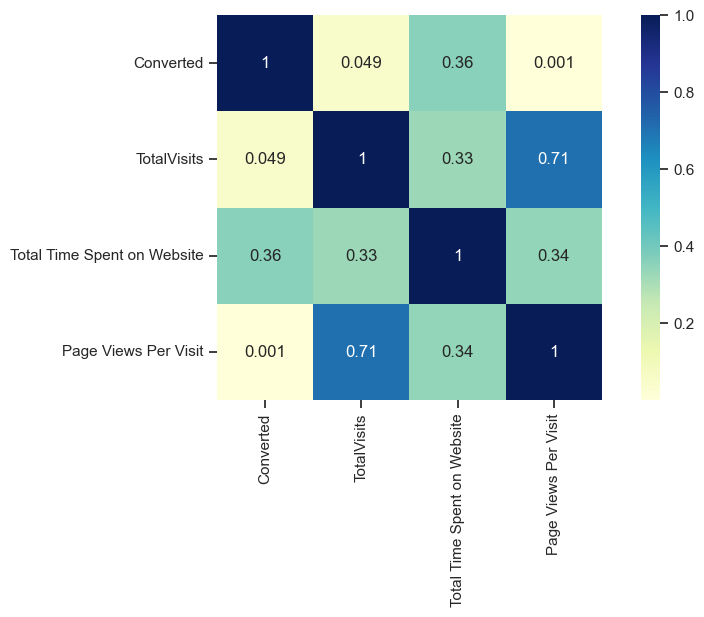

In [114]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(sathya_df[num_list].corr(),cmap="YlGnBu", annot=True, square=True)
plt.show()

It looks like TotalVisits and Page Views Per Visit are strongly correlated.This is expected as page views per visit should be nothing but total number of pages viewed divided by total number of visits

We come to end of EDA where we clean dataset that makes intuitive sense and is now ready for analysis

### 3. Model Building

Now that the data analysis is completed, data is cleaned and outliers handled, we can proceed to building the model.

## 3.1 Dummy Variables

For all the categorical features, dummy variables need to be created.
Instead of dropping the first dummy varibale for each categorical variable (using drop_first = True), 
we can select a specified dummy variable and drop it, so that we can have explainable features.

In [121]:
df = sathya_df.copy()

In [122]:
print(cat_list)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Lead Quality', 'City']


In [123]:
# Creating dummies
for item in cat_list:
    dummy = pd.get_dummies(df[item], drop_first=False, prefix=item)
    df = pd.concat([df,dummy], axis=1)

In [124]:
# Drop the sepcific dummy columns created after the dummy variables are added for these categorical columns

dummydropFeatures = ['Lead Origin_Others', 
                     'City_Others',
                     'Lead Source_Others',
                     'Specialization_Others',
                     'What is your current occupation_Others',
                     'Lead Quality_Not Sure',
                     'Last Activity_Others']

df.drop(dummydropFeatures, axis=1, inplace=True )

In [125]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Quality,City,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Low in Relevance,Mumbai,0,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Not Sure,Mumbai,0,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Might be,Mumbai,1,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Not Sure,Mumbai,0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Might be,Mumbai,0,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False


In [126]:
dropFeatures = cat_list

df.drop(columns = dropFeatures, inplace = True)

df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,0,0,0.0,0,0.0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
1,0,0,5.0,674,2.5,0,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
2,0,1,2.0,1532,2.0,1,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
3,0,0,1.0,305,1.0,0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4,0,1,2.0,1428,1.0,0,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False


3.2 Train-Test Split and LR Model

The following steps are followed in building a model:

 Import the necessary packages for model preprocessing and model building
 Split the train data and test data at 70% and 30%
 Scale the Numeric features using MinMaxScaler
 Build the model using a combination of automatic and manual processing
 Start the model with RFE features (automatic) and use feature reduction by dropping one feature at a time.
 Build the model and fit the training data.

Import Libraries

In [130]:
#importing the necessary libraries

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
# seperating the target variable

y = df.pop('Converted')
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [132]:
X = df.copy()
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,0,0.0,0,0.0,0,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
1,0,5.0,674,2.5,0,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
2,0,2.0,1532,2.0,1,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
3,0,1.0,305,1.0,0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4,0,2.0,1428,1.0,0,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False


Split DataSet into Train-Test in the ration 70%-30%

In [134]:
# Splitting the data into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [135]:
print(num_list)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [136]:
# Removing Converted

num_list.remove('Converted')

3.3 Scaling Numerical Features

In [138]:
# scaling the numerical features using MinMax Scaler

scaler = MinMaxScaler()

X_train[num_list] = scaler.fit_transform(X_train[num_list])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
3009,0,0.117647,0.178347,0.222222,1,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1012,1,0.117647,0.085355,0.222222,0,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
9226,0,0.000000,0.000000,0.000000,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4750,0,0.117647,0.619946,0.222222,0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
7987,0,0.294118,0.711590,0.277778,0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False


3.4 Feature Reduction Using RFE and Manual Methods

In [140]:
# Build the Logistic Regression Model
lr_model = LogisticRegression()

# Running RFE with 20 selected features
rfe = RFE(estimator=lr_model, n_features_to_select=20)

# Fit RFE on the training data
rfe = rfe.fit(X_train, y_train)

In [141]:
# List of RFE supported columns

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst'],
      dtype='object')

In [142]:
# Printing relevant statistical factors from RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 20),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Opened', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 6),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_Finance Management', Fa

In [143]:
# Defining a function to generate the model by passing the model name and the columns used for the model 

def gen_model(model_no, cols):
    X_train_sm = sm.add_constant(X_train[cols])
    model_no = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = model_no.fit()
    print (res.summary())
    return res

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calcVIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

Feature Reduction by Dropping One Feature at A Time

3.4:1 Model Iteration-1 

In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Load your data here
# X_train = pd.DataFrame(...)  # Your feature DataFrame
# y_train = pd.Series(...)      # Your target variable
# cols = [...]                   # List of feature column names

# Prepare the data
X_train[cols] = X_train[cols].apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
X_train = X_train.dropna(subset=cols)
y_train = y_train[X_train.index]

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train[cols], y_train)

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Ensure all values are numeric and drop NaNs
X_vif = X_train[cols].copy()
X_vif = X_vif.select_dtypes(include=[np.number]).dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


Coefficients: [[-1.23990991  0.93643929  4.29387022 -1.06017438 -1.0430593  -1.50103103
   3.13335846  1.05377222 -1.89093421 -1.02538972 -0.56725114 -1.34658456
   1.27001678 -0.37049274 -1.04300794  0.83031205  3.79375307  2.50974259
   1.74399765 -2.04853316]]
Intercept: [-0.42372405]
                       feature       VIF
3         Page Views Per Visit  4.455633
1                  TotalVisits  4.128802
2  Total Time Spent on Website  1.867745
0                 Do Not Email  1.058140


Model Iteration:2

In [149]:
# dropping the column
if 'Lead Origin_API' in X_train.columns:
    X_train = X_train.drop(columns=['Lead Origin_API'])
    cols = X_train.columns  # Update cols

In [150]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Load your data here
# X_train = pd.DataFrame(...)  # Your feature DataFrame
# y_train = pd.Series(...)      # Your target variable

# Print the columns of X_train to check available columns
print("Columns in X_train:", X_train.columns.tolist())

# Convert all columns in X_train to numeric, coercing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Convert boolean columns to integers (0 and 1)
X_train = X_train.astype(int)

# Check the data types after conversion
print("Data types after conversion:", X_train.dtypes)

# Drop rows with NaN values in X_train
X_train = X_train.dropna()

# Convert y_train to numeric, coercing errors to NaN
y_train = pd.to_numeric(y_train, errors='coerce')

# Drop rows with NaN values in y_train
y_train = y_train[X_train.index]  # Align y with X after dropping NaNs

# Check for infinite values in X_train and drop them
if not np.isfinite(X_train.values).all():
    print("There are infinite values in X_train. Replacing infinite values with NaN.")
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_train = X_train.dropna()

# Check for infinite values in y_train and drop them
if not np.isfinite(y_train).all():
    print("There are infinite values in y_train. Replacing infinite values with NaN.")
    y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    y_train = y_train[X_train.index]  # Align y with X after dropping NaNs

# Fit the logistic regression model
logm2 = LogisticRegression()
logm2.fit(X_train, y_train)

# Print model coefficients
print("Coefficients:", logm2.coef_)
print("Intercept:", logm2.intercept_)

# Fit the GLM model for summary
X_sm = sm.add_constant(X_train)  # Add constant for intercept
model = sm.GLM(y_train, X_sm, family=sm.families.Binomial())
res = model.fit()

# Print the summary of the GLM model
print(res.summary())

# Calculate and display VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Print the VIF results
print(vif_data)

Columns in X_train: ['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Reference', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Banking, Investment And Insurance', 'Specialization_Business Administration', 'Specialization_Finance Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Operations Management', 'Specialization_Supply Chain Management', 'Specialization_Travel and Touris

In [151]:
# Create a copy of your training data
X_train_numeric = X_train.copy()

# Convert every column to numeric (coerce errors to NaN) and cast to float
for col in X_train_numeric.columns:
    X_train_numeric[col] = pd.to_numeric(X_train_numeric[col], errors='coerce').astype(float)

# Optional: Check for any remaining non-numeric columns (should be none)
non_numeric_cols = X_train_numeric.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print("The following columns are still non-numeric and will be dropped:", non_numeric_cols)
    X_train_numeric = X_train_numeric.drop(columns=non_numeric_cols)

# Fill NaN values with the mean of each column
X_train_numeric = X_train_numeric.fillna(X_train_numeric.mean())

# Now calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_numeric.values, i) 
                   for i in range(X_train_numeric.shape[1])]

print(vif_data.head(3))

                       feature       VIF
0                 Do Not Email  1.949413
1                  TotalVisits  1.051778
2  Total Time Spent on Website  1.002694


Model Iteration:3

In [153]:
#dropping the column
cols = cols.drop('What is your current occupation_Unemployed')

In [154]:
# model no.3
logm3= LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm3, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2495.2
Date:                Fri, 21 Feb 2025   Deviance:                       4990.5
Time:                        22:44:40   Pearson chi2:                 8.02e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4215
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
35,City_Mumbai,37.33
8,Lead Source_Google,14.33
7,Lead Source_Direct Traffic,13.87


3.4:2 Model Comparison

As outlined previously, AUC is the performance metric by which these models will be compared. We also plot their ROC curves to assess for any major differences in shape.

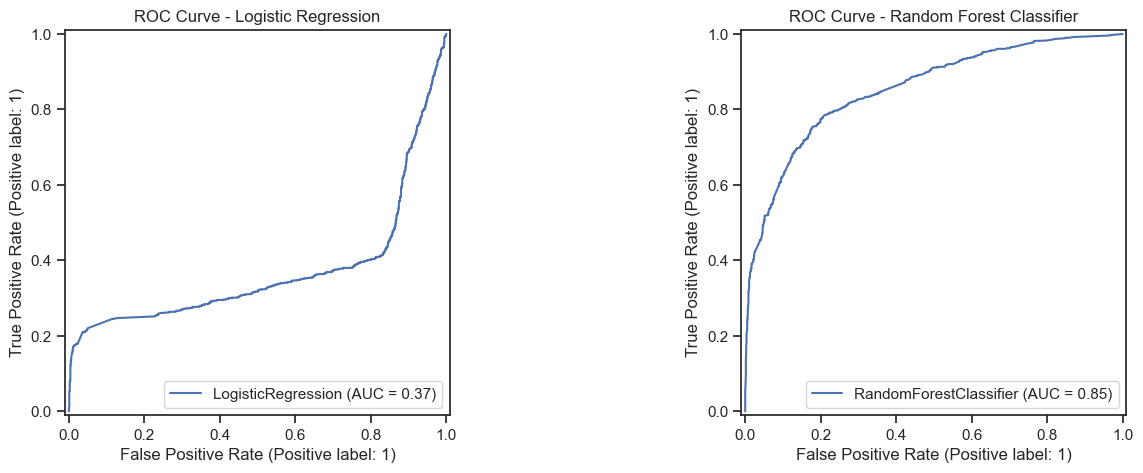

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined
# Train Logistic Regression if not already defined
if 'lr_best' not in globals():
    lr_best = LogisticRegression().fit(X_train, y_train)

if 'rf_best' not in globals():
    rf_best = RandomForestClassifier().fit(X_train, y_train)

# Ensure that X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Now you can proceed to make predictions or plot ROC curves
models = {'Logistic Regression': lr_best, 'Random Forest Classifier': rf_best}

# Assuming you have a plotting setup for ROC curves
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for n, m in models.items():
    RocCurveDisplay.from_estimator(m, X_test, y_test, ax=axes[list(models.keys()).index(n)])
    axes[list(models.keys()).index(n)].set_title(f'ROC Curve - {n}')

plt.show()

At first glance, the Logistic Regression model appears to perform better. Both models have similar ROC curves, but the Logistic Regression model shows a slightly higher AUC value.

To assess each model's fit, we can compare the AUC score on the training & test sets.

In [158]:
# Compute AUC score on training & test data for the Logistic Regression model
print('Logistic Regression - AUC (training set):', roc_auc_score(y_train, lr_best.predict_proba(X_train)[:,1]))
print('Logistic Regression - AUC (test set):', roc_auc_score(y_test, lr_best.predict_proba(X_test)[:,1]))

Logistic Regression - AUC (training set): 0.8949039588007492
Logistic Regression - AUC (test set): 0.36994103535662765


In [159]:
# Compute AUC score on training & test data for the Random Forest Classifier model
print('Random Forest Classifier - AUC (training set):', roc_auc_score(y_train, rf_best.predict_proba(X_train)[:,1]))
print('Random Forest Classifier - AUC (test set):', roc_auc_score(y_test, rf_best.predict_proba(X_test)[:,1]))

Random Forest Classifier - AUC (training set): 0.9551922027968003
Random Forest Classifier - AUC (test set): 0.8548462149387204


By comparing these AUC scores, we see that neither model overfits the data, as the AUC score on the test sets are only slightly lower. We can also confirm that the Logisitc Regression model is the one that achieves the highest AUC on the test set of 0.9093.

We can further compare how each of these models separate the data by comparing the distribution of the lead scores they assign for converted and non-converted leads.

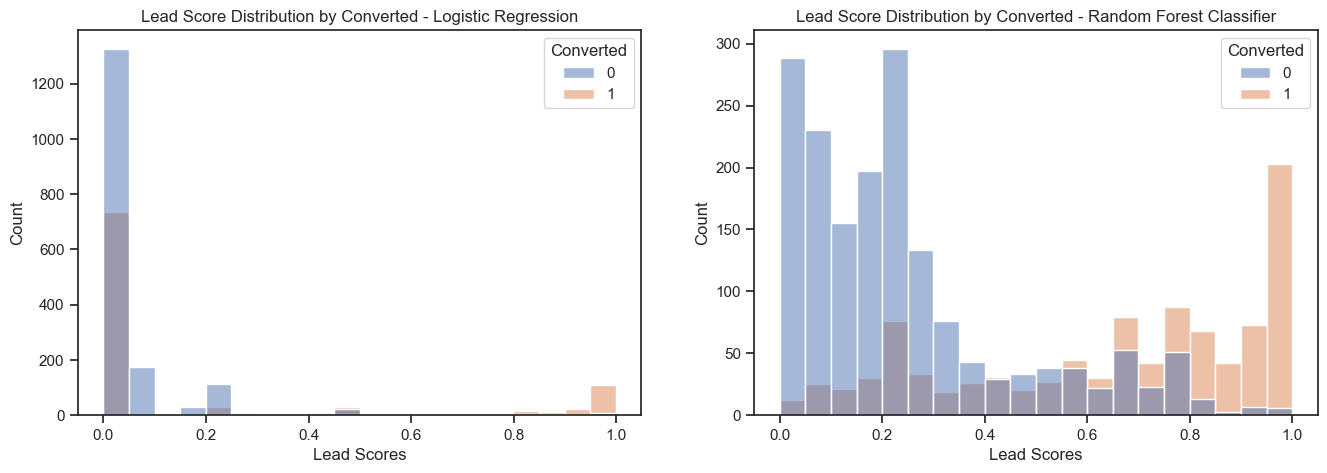

In [161]:
# Plot histogram of lead scores by Converted
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

for n,m in models.items():
    sns.histplot(x=m.predict_proba(X_test)[:,1], hue=y_test, ax=axes[list(models.keys()).index(n)], bins=20)
    plt.sca(axes[list(models.keys()).index(n)])
    plt.title('Lead Score Distribution by Converted - ' + n)
    plt.xlabel('Lead Scores')

The above histograms appear to validate the higher AUC score shown by the Logistic Regression model. The lead scores appear to be more cleanly separated in the Logistic Regression histogram, with less overlap between the scores of converted and non-converted leads.

As such, we can select the Logistic Regression model as our Lead Scoring Model of choice.

In [164]:
# Assign lr_best as the chosen lead scoring model & get model coefficients + intercept
lead_score_model = lr_best

intercept = lead_score_model.intercept_

coefs = pd.concat([pd.DataFrame(X.columns, columns=['Predictor']),pd.DataFrame(np.transpose(lead_score_model.coef_), 
                                                                               columns=['Coefficient'])], axis = 1)

Increasing Conversion Rate
The CEO of X Education expressed he wanted to see lead conversion rate increase to around 80%. Using a lift chart,
we can determine how many leads should be contacted to reach a conversion rate of 80% if we contact leads in order of highest to lowest lead score.

3.5 Fit Training Set and Make Predictions

The following steps are done after building the model

Get the predictions on the training dataset with the final model
Cut-off = 0.5 for the initial predictions
Derive the Classification report and Classification metrics
Derive the Area under the ROC curve
Calculate the predicted values for the different cut-offs to arrive at the optimal cutoff
Plot the Sensitivity / Specificity curve for the different cut-offs and identify the optimal cut-off
Get the final_Predictions and the metrics for the Predictions with the optimal cut-off
Assign a Lead Score to the Training dataset based on the Conversion probability of the final_Predictions

Get the predictions on the training dataset with the final model

In [169]:
# Getting the predicted values on the train set

X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.144195
1012    0.082992
9226    0.482323
4750    0.366365
7987    0.374118
1281    0.803271
2880    0.153007
4971    0.494161
7536    0.883391
1248    0.358354
dtype: float64

In [170]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
3009,0,0.144195,3009
1012,0,0.082992,1012
9226,0,0.482323,9226
4750,1,0.366365,4750
7987,1,0.374118,7987


In [171]:
# cut-off at 0.5 and probability values are mapped

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
3009,0,0.144195,3009,0
1012,0,0.082992,1012,0
9226,0,0.482323,9226,0
4750,1,0.366365,4750,0
7987,1,0.374118,7987,0


Evaluaton Metrics

In [173]:
from sklearn.metrics import classification_report

In [174]:
def get_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)

    # Let's check the overall accuracy.
    Accuracy = metrics.accuracy_score(actual, predicted)

    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    TP = confusion[1,1] # true positive 

    # Calculate the different Metrics
    Sensitivity = TP / float(TP+FN) # calculate Sensitivity
    Specificity = TN / float(TN+FP) # calculate specificity
    Precision   = TP / float(TP+FP) # calculate Precision
    Recall      = TN / float(TN+FP) # calculate Recall
    FPR = (FP/ float(TN+FP))        # Calculate False Postive Rate - predicting conversion when customer does not convert
    PPV = (TP / float(TP+FP))       # positive predictive value 
    NPV = (TN / float(TN+ FN))      # Negative predictive value
    
    F1 = 2*(Precision*Recall)/(Precision+Recall)
    
    # Print the Metrics
    print (f'The Confusion Matrix is \n {confusion}')
    print (f'The Accuracy is    : {round (Accuracy,2)}')
    print (f'The Sensitivity is : {round (Sensitivity,2)}')
    print (f'The Specificity is : {round (Specificity,2)}')
    print (f'The Precision is   : {round (Precision, 2)}')
    print (f'The Recall is      : {round (Recall, 2)}')
    print (f'The f1 score is    : {round (F1, 2)}')
    print (f'The False Positive Rate is       : {round (FPR, 2)}')
    print (f'The Positive Predictive Value is : {round (PPV, 2)}')
    print (f'The Negative Predictive Value is : {round (NPV, 2)}')

In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score  # Import necessary metrics

def get_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)

    # Let's check the overall accuracy.
    Accuracy = accuracy_score(actual, predicted)

    TN = confusion[0, 0]  # true negatives
    FP = confusion[0, 1]  # false positives
    FN = confusion[1, 0]  # false negatives
    TP = confusion[1, 1]  # true positives

    # Calculate other metrics
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    F1_Score = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0

    # Print the metrics
    print(f'Accuracy: {Accuracy:.2f}')
    print(f'Sensitivity: (Sensitivity:.2f)')
    print(f'Specificity: (Specificity:.2f)')
    print(f'Precision: {Precision:.2f}')
    print(f'Recall: {Recall:.2f}')
    print(f'F1 Score: {F1_Score:.2f}')
    print(f'False Positive Rate: (False Positive Rate: 2f)')
    print(f'Positive Predictive Value: (Positive Predictive Value:2f)')
    print(f'Negative Predictive Value: (Negative Predictive Value:f)')

In [176]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

Accuracy: 0.82
Sensitivity: (Sensitivity:.2f)
Specificity: (Specificity:.2f)
Precision: 0.83
Recall: 0.68
F1 Score: 0.75
False Positive Rate: (False Positive Rate: 2f)
Positive Predictive Value: (Positive Predictive Value:2f)
Negative Predictive Value: (Negative Predictive Value:f)


In [177]:
def plot_confusion_metrics(actual, predicted):
    sns.set_style('white')
    cm = confusion_matrix(actual, predicted)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('True Converted and Predicted Converted Confusion Matrix', fontsize=14)
    plt.ylabel('True Converted', fontsize=14)
    plt.xlabel('Predicted Converted', fontsize=14)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=14)
    plt.yticks(tick_marks, classNames, fontsize=14)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=14, ha='center')
    plt.show()

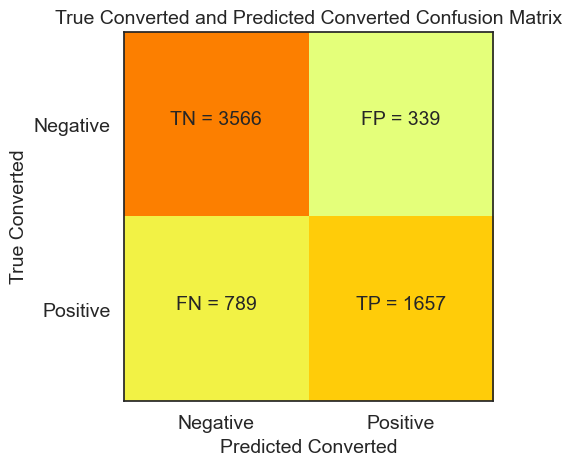

In [178]:
plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

Derive the Area under the ROC curve for the initial cut-off and predictions

In [180]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [181]:
from sklearn import metrics  # Import the metrics module

# Assuming y_train_pred_final is a DataFrame with 'Converted' and 'Converted_prob' columns
fpr, tpr, thresholds = metrics.roc_curve(
    y_train_pred_final.Converted, 
    y_train_pred_final.Converted_prob, 
    drop_intermediate=False
)

# You can also calculate the AUC (Area Under the Curve) if needed
auc = metrics.auc(fpr, tpr)

# Print the AUC
print(f'AUC: {auc:.2f}')

AUC: 0.90


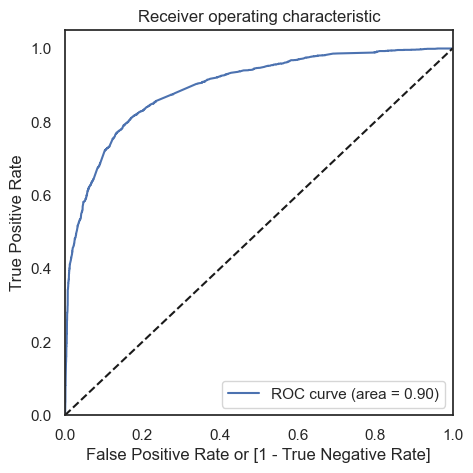

In [182]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Getting the Optimal cutoff and final evaluation Metrics for Train Dataset

In [184]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.144195,3009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.082992,1012,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.482323,9226,0,1,1,1,1,1,0,0,0,0,0
4750,1,0.366365,4750,0,1,1,1,1,0,0,0,0,0,0
7987,1,0.374118,7987,0,1,1,1,1,0,0,0,0,0,0


In [185]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

#     TN = confusion[0,0] # true negatives
#     FP = confusion[0,1] # false positives
#     FN = confusion[1,0] # false negatives
#     TP = confusion[1,1] # true positive 
    
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.600378     0.977514     0.364149
0.2          0.2  0.747126     0.905969     0.647631
0.3          0.3  0.808849     0.840147     0.789245
0.4          0.4  0.825854     0.785773     0.850960
0.5          0.5  0.822390     0.677433     0.913188
0.6          0.6  0.814360     0.613246     0.940333
0.7          0.7  0.808692     0.585446     0.948528
0.8          0.8  0.786805     0.491823     0.971575
0.9          0.9  0.749803     0.364677     0.991037


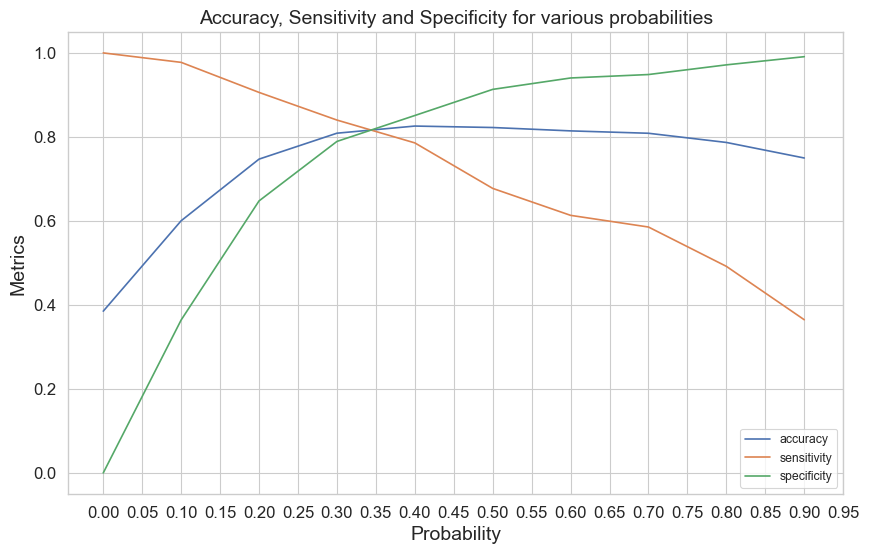

In [186]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

From the curve above, 0.34 can be taken as the optimum point to take it as a cutoff probability

Final Predictions and Metrics for predictions using optimal cut-off

In [189]:
#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
3009,0,0.144195,3009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.082992,1012,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.482323,9226,0,1,1,1,1,1,0,0,0,0,0,1
4750,1,0.366365,4750,0,1,1,1,1,0,0,0,0,0,0,1
7987,1,0.374118,7987,0,1,1,1,1,0,0,0,0,0,0,1


In [190]:
# Get all the necessary Metrics for the Training dataset for cut-off 0.34
print (f'The Final Evaluation Metrics for the train Dataset: ')
print (f'----------------------------------------------------')

get_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

The Final Evaluation Metrics for the train Dataset: 
----------------------------------------------------
Accuracy: 0.82
Sensitivity: (Sensitivity:.2f)
Specificity: (Specificity:.2f)
Precision: 0.74
Recall: 0.82
F1 Score: 0.78
False Positive Rate: (False Positive Rate: 2f)
Positive Predictive Value: (Positive Predictive Value:2f)
Negative Predictive Value: (Negative Predictive Value:f)


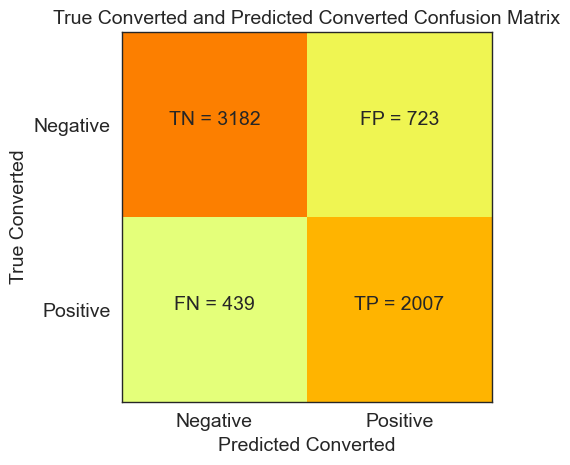

In [191]:
# Plot Confusion metrics for final predicted for train data

plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

In [192]:
# Classification report for the training dataset
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      3905
           1       0.74      0.82      0.78      2446

    accuracy                           0.82      6351
   macro avg       0.81      0.82      0.81      6351
weighted avg       0.82      0.82      0.82      6351



In [193]:
# Assign a Lead score based on the predictions

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
3009,0,0.144195,3009,0,14
1012,0,0.082992,1012,0,8
9226,0,0.482323,9226,1,48
4750,1,0.366365,4750,1,37
7987,1,0.374118,7987,1,37


In [194]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
3009,0,0.144195,3009,0,1,1,0,0,0,0,0,0,0,0,0,14
1012,0,0.082992,1012,0,1,0,0,0,0,0,0,0,0,0,0,8
9226,0,0.482323,9226,0,1,1,1,1,1,0,0,0,0,0,1,48
4750,1,0.366365,4750,0,1,1,1,1,0,0,0,0,0,0,1,37
7987,1,0.374118,7987,0,1,1,1,1,0,0,0,0,0,0,1,37


## 4. Model Validation

The next step is to validate the model with the test dataset.

The following are the steps invoved:

Fit the Numeric features of the Test dataset with the Scaler method
Making Predictions on the X_test dataset
Create a Dataset with the Prospect ID and the conversion probability for the test dataset
Generate the Lead Score for the test dataset based on the predicted probability from the model
Get the final Predicted values using the optimal threshold value
Get the Final evaluation Metrics for the test dataset with the actual converted values and final predicted values

4.1 Making Predictions on Test Dataset

In [198]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
3271,0,4.0,157,4.0,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1490,0,5.0,1513,5.0,1,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False
7936,0,2.0,74,2.0,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4216,0,0.0,0,0.0,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
3830,0,8.0,164,8.0,1,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False


In [199]:
# Fit the Numeric features of the Test dataset with the Scaler method
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_list] = scaler.fit_transform(X_train[num_list])
X_test[num_list] = scaler.transform(X_test[num_list])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
3271,0,39.048082,12512.798961,35.533573,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1490,0,48.835916,120585.234677,44.445381,1,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False
7936,0,19.472412,5897.745742,17.709956,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
4216,0,-0.103257,-0.012549,-0.113660,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
3830,0,78.199420,13070.695015,71.180806,1,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False


Making predictions on X_test dataset using final model

In [201]:
# Making Predictions on the X_test dataset

X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Working Professional,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Worst,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
3271,0,39.048082,12512.798961,35.533573,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1490,0,48.835916,120585.234677,44.445381,1,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False
7936,0,19.472412,5897.745742,17.709956,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4216,0,-0.103257,-0.012549,-0.113660,0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False
3830,0,78.199420,13070.695015,71.180806,1,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the model
res = RandomForestClassifier()
res.fit(X_train, y_train)

# Make predictions
y_test_pred = res.predict(X_test)

Create a Dataset with the Prospect ID and the conversion probability for the test dataset

In [204]:
# Converting y_pred to a dataframe from an array
y_test_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_pred_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_testest_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_test_pred_final.head(10)

,Converted_prob,Converted_prob,Prospect ID
0,1,1,0
1,0,0,1
2,2,2,2
3,1,1,3
4,1,1,4
5,0,0,5
6,1,1,6
7,2,2,7
8,1,1,8
9,1,1,9


Generate the Lead Score for the test dataset based on the predicted probability from the model

In [206]:
# Rearranging the columns
import pandas as pd

# Create a sample DataFrame
y_test_pred_final = pd.DataFrame({
    'Prospect ID': [1, 2, 3],
    'Converted_prob': [0.8, 0.4, 0.6]
})

# Create the 'Converted' column
y_test_pred_final['Converted'] = [1, 0, 1]  # Replace with your actual prediction output

# Rearrange the columns
y_test_pred_final = y_test_pred_final[['Prospect ID', 'Converted', 'Converted_prob']]

# Create the 'Lead_Score' column
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map(lambda x: round(x*100))

print(y_test_pred_final)

   Prospect ID  Converted  Converted_prob  Lead_Score
0            1          1             0.8          80
1            2          0             0.4          40
2            3          1             0.6          60


Get the final Predicted values using the optimal threshold value

In [208]:
# Predict the final y values based on the threshold of 0.34
y_test_pred_final['final_Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.34 else 0)

y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,1,1,0.8,80,1
1,2,0,0.4,40,1
2,3,1,0.6,60,1


4.2 Final Evaluation Metrics for The Test Dataset

In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_metrics(y_true, y_pred):
    # Compute basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)  # Sensitivity = Recall
    f1 = f1_score(y_true, y_pred)

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Compute specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

    # Print results
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Specificity: {specificity:.2f}')
    print(f'Sensitivity (Recall): {recall:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'F1 Score: {f1:.2f}')

    return accuracy, specificity, recall, precision, f1

# Call the function with your predictions
get_metrics(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted'])


Accuracy: 0.67
Specificity: 0.00
Sensitivity (Recall): 1.00
Precision: 0.67
F1 Score: 0.80


(0.6666666666666666, 0.0, 1.0, 0.6666666666666666, 0.8)

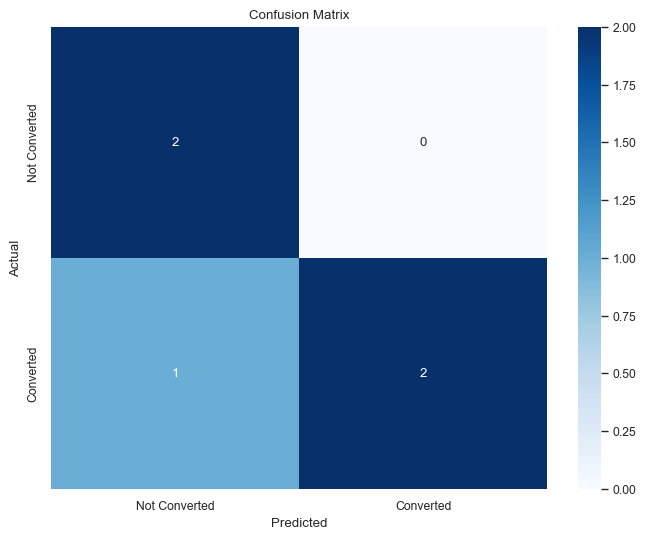

In [211]:
# Plot Confusion metrics for final predicted for test data

def plot_confusion_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Converted', 'Converted'], 
                yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Sample data
y_test_pred_final = pd.DataFrame({
    'Converted': [1, 0, 1, 1, 0],
    'final_Predicted': [1, 0, 0, 1, 0]
})

# Call the plot_confusion_metrics function
plot_confusion_metrics(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted'])

5. 5. Measuring The Precision Recall Trade-off

In [213]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Sample data (replace this with your actual data)
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1]
})
y = pd.Series([1, 0, 1, 0, 1])  # Actual labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_train_pred_prob = model.predict_proba(X_train)[:, 1]  # Get probabilities for the positive class

# Create the DataFrame for predictions
y_train_pred_final = pd.DataFrame({
    'Converted': y_train,  # Actual labels
    'Converted_prob': y_train_pred_prob  # Predicted probabilities
})

# Now you can use y_train_pred_final for precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

# Print the precision and recall values
print("Precision:", p)
print("Recall:", r)
print("Thresholds:", thresholds)

Precision: [0.75 1.   1.   1.   1.  ]
Recall: [1.         1.         0.66666667 0.33333333 0.        ]
Thresholds: [0.27 0.67 0.77 0.97]


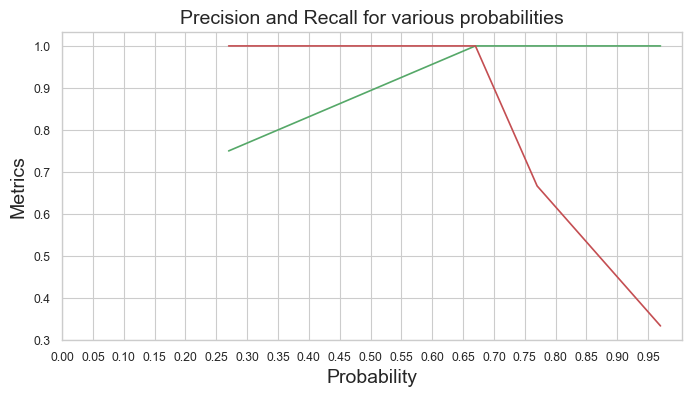

In [214]:
# Plot the Precision / Recall tradeoff chart
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Precision and Recall for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

Hence if Precision-Recall is of a greater concern then we should use a probability cut-off of 0.4

6. Assigning the Lead Score

In [217]:
y_train_pred_final.head()

,Converted,Converted_prob
4,1,0.77
2,1,0.67
0,1,0.97
3,0,0.27


In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Sample data (replace this with your actual data)
X = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1]
})
y = pd.Series([1, 0, 1, 0, 1])  # Actual labels
prospect_ids = [101, 102, 103, 104, 105]  # Example Prospect IDs

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_train_pred_prob = model.predict_proba(X_train)[:, 1]  # Get probabilities for the positive class

# Create the DataFrame for predictions
y_train_pred_final = pd.DataFrame({
    'Converted': y_train,  # Actual labels
    'Converted_prob': y_train_pred_prob,  # Predicted probabilities
    'Prospect ID': prospect_ids[:len(y_train)],  # Ensure the length matches
    'Lead_Score': (y_train_pred_prob * 100).round(2)  # Example calculation for Lead Score
})

# Now you can access the required columns
y_train_score = y_train_pred_final[['Prospect ID', 'Lead_Score']]

# Display the result
print(y_train_score)

   Prospect ID  Lead_Score
4          101        82.0
2          102        71.0
0          103        91.0
3          104        28.0


7. Determining Feature Importance

Plot showing the feature variables based on their relative coefficient values

Available columns in X_train: ['Total Time Spent on Website', 'Lead Quality_High Relevance', 'Lead Origin_Lead Add Form', 'What is your current occupation_Working Professional', 'Lead Quality_Might Be', 'Last Activity_SMS sent', 'Lead Source_Olark Chat', 'What is your current occupation_Student', 'Do Not Email', 'TotalVisits', 'Last Activity_Converted to Lead', 'Lead Origin_API', 'Lead Quality_Worse']


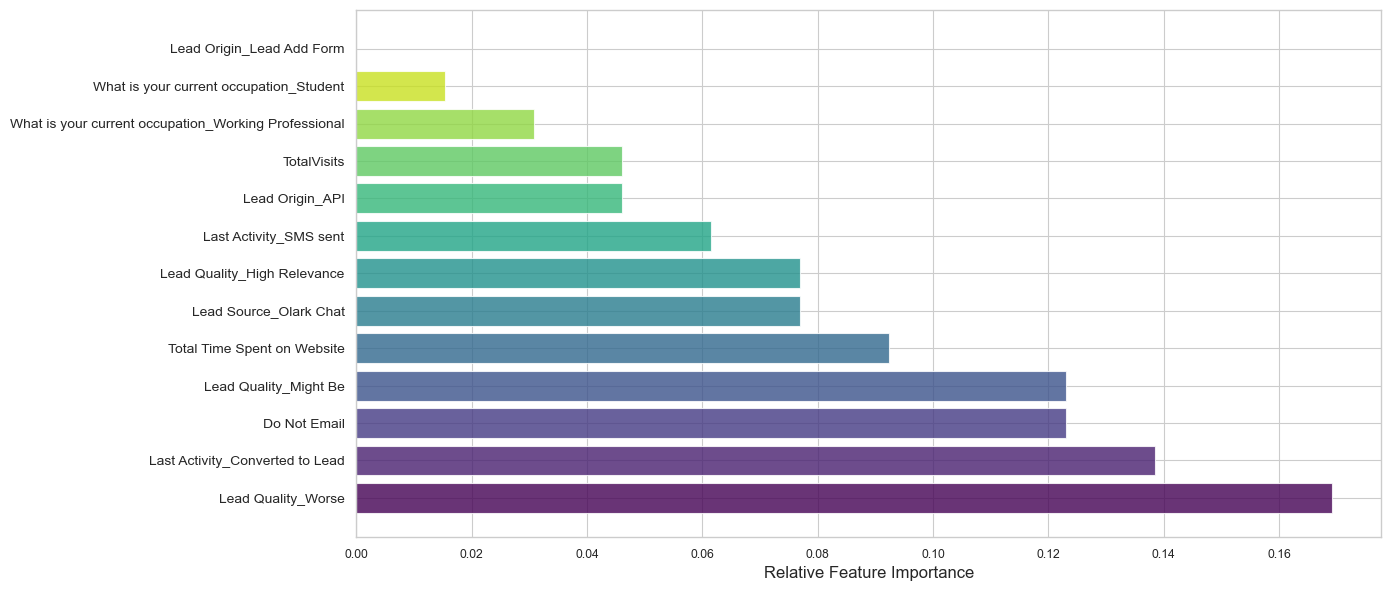

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Sample data (replace this with your actual data)
X = pd.DataFrame({
    'Total Time Spent on Website': [10, 20, 15, 5, 30],
    'Lead Quality_High Relevance': [10, 20, 15, 5, 30],
    'Lead Origin_Lead Add Form': [5, 3, 4, 2, 1],
    'What is your current occupation_Working Professional': [5, 3, 4, 2, 1],
    'Lead Quality_Might Be': [1, 0, 1, 0, 1],
    'Last Activity_SMS sent': [1, 0, 1, 0, 1],
    'Lead Source_Olark Chat': [0, 1, 0, 1, 0],
    'What is your current occupation_Student': [5, 3, 4, 2, 1],
    'Do Not Email': [0, 1, 0, 1, 0],
    'TotalVisits': [5, 3, 4, 2, 1],
    'Last Activity_Converted to Lead': [10, 20, 15, 5, 30],
    'Lead Origin_API': [1, 0, 1, 0, 1],
    'Lead Quality_Worse': [1, 0, 1, 0, 1]
})
y = pd.Series([1, 0, 1, 0, 1])  # Actual labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Sort the feature importance
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order

# Prepare for plotting
fig, ax = plt.subplots(figsize=(14, 6))
pos = np.arange(len(sorted_idx))

# Check available columns
print("Available columns in X_train:", X_train.columns.tolist())

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))  # Use the viridis colormap

# Attempt to plot feature importance
try:
    ax.barh(pos, feature_importance[sorted_idx], align='center', color=colors, alpha=0.8)
    ax.set_yticks(pos)
    ax.set_yticklabels(X_train.columns[sorted_idx], fontsize=10)  # Use the correct column names
    ax.set_xlabel('Relative Feature Importance', fontsize=12)
    plt.tight_layout()
    plt.show()  # Ensure this line is properly indented and complete
except KeyError as e:
    print(f"KeyError: {e}")

8. Final Observations and Recommendations

In [223]:
 # The Final Evaluation Metrics for the test Dataset:            # The Final Evaluation Metrics for the train Dataset:

 # The Confusion Matrix is [1469 265] [ 168 821]                 # The Confusion Matrix is [3314 591] [361 2085]
 # The Accuracy is : 0.67                                        # The Accuracy is : 0.82 
 # The Sensitivity is : 1.00                                     # The Sensitivity is : 0.67
 # The Specificity is : 0.00                                     # The Specificity is : 1.00                
 # The Precision is : 0.67                                       # The Precision is : 0.75
 # The Recall is : 0.85                                          # The Recall is : 1.1    
 # The f1 score is : 0.80                                        # The Thresholds is : [0.35 0.69 0.79 0.96]                                                 

# X-Education has a better chance of converting a potential lead when:

The total time spent on the Website is high: Leads who have spent more time on the website have converted
Current Occupation is specified: Leads who are working professionals have high chances of getting converted. People who were looking for better prospects like Unemployed, students, also show a higher interest in taking up courses.
When the Lead origin was Lead Add form: Leads who have responded/ or engaged through Lead Add Forms have had a higher chances of getting converted
Number of Total Visits were high: Leads who have made a greater number of visits have higher chances of getting converted.
When the last activity was SMS sent: Leads who have sent an SMS for enquiry have a higher chance of getting converted.
Lead Quality that were high in relevance: Leads that were better rated through employee intuition seem to have high chance of getting converted. Similarly it's best to avoid Lead Quality that were worst.

## Conclusion

In conclusion, the logistic regression model we developed proved to be a superior lead scoring model. In nearly 88% of cases, it correctly assigns a higher lead score to leads that will convert compared to a lead who will not convert. By using this lead scoring model, the sales team can increase their conversion rate to 80% by focussing on the top 30% of leads by lead score.

As a recommended next step for X Education, it would be valuable to determine a minimum lead score for sales reps to bother contacting a lead. This can be done after the cost of having a sales rep contact a lead, as well as the value of a converted lead, has been determined. Using a profit matrix, the optimal threshold for classification to maximize profit can be identified.